## Quantum Teleportation: How to send a qubit?

In [35]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from funcs import *
import numpy as np
import math

## Build Quantum Circuit

### Step1 : Prepare a  $ \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle $ entanglement. Distribute them to Alice and Bob.

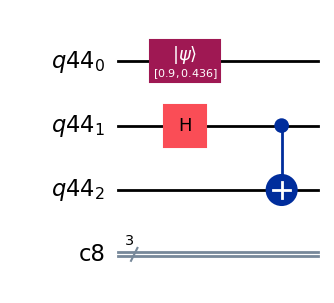

In [36]:
qc = QuantumCircuit()
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc.add_register(q, c)
r = 0.9
r2 = math.sqrt(1 - r**2)
qc.initialize([r, r2], q[0])
qc.h(q[1])
qc.cx(q[1], q[2])

qc.draw(output='mpl')

### Alice got q1 and Bob got q2. Alice made q1 and q0 (qubit she wanna sent) entangled by CNOT gate.

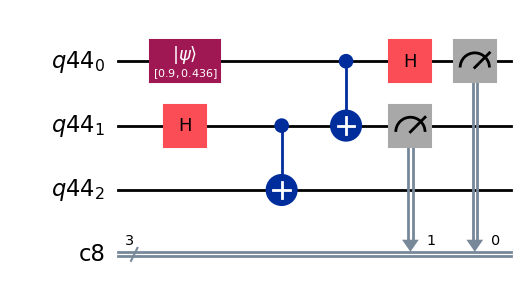

In [37]:
qc.cx(q[0], q[1])
qc.h(q[0])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.draw(output='mpl')

### Bob operates on his own qubit according to information in classical bit

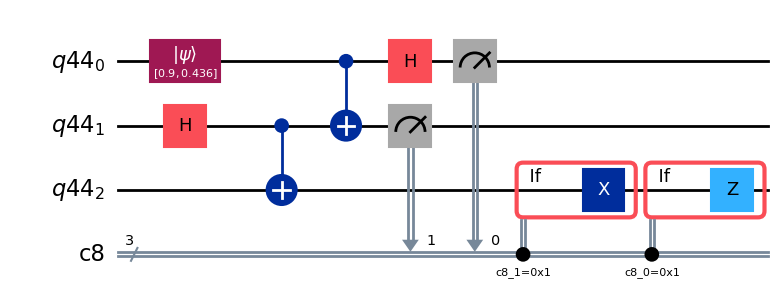

In [38]:
# control qubits by classical bits
# Attention: you can only do this on a simulator

with qc.if_test((c[1], 1)) as else_:  
    qc.x(q[2])
with qc.if_test((c[0], 1)) as else_:  
    qc.z(q[2])

qc.draw(output='mpl')


### Measure q2 to see if it equals original q0

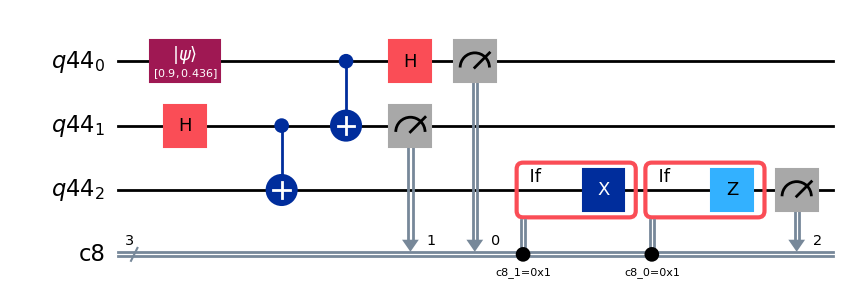

In [39]:
qc.measure(q[2], c[2])
qc.draw(output='mpl')

### execute circuit and process results

In [40]:
results = execute_qc(qc)
print(results)
counts = [0, 0]
for key, value in results.items(): 
    ## here I found the order of classical bits in results will be changed.
    ## I think it is a bug of qiskit.
    ## However, the probability of 0 and 1 will be correct, ignoring the order of bits.
    ## So after experiment, I found key[0] actually refers to q2. 
    if key[0]=='0':     
        counts[0] += value
    else:
        counts[1] += value
print(counts)


{'010': 216, '001': 214, '111': 54, '000': 201, '100': 50, '011': 187, '110': 47, '101': 55}
[818, 206]


### check if the results are expected